In [3]:
import pandas as pd
file = 'mdata/expanded.csv' 
mushroom = pd.read_csv(file)

In [4]:
mushroom.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [5]:
#create dataset with column of missing values removed
#roots = mushroom.stalk_root
ignore_roots=mushroom.drop('stalk_root',1)

label=mushroom['class']
data=ignore_roots.drop('class',1)

In [6]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
data_dict = data.to_dict('records')

encoded_data=v.fit_transform(data_dict)

y_list=[]
for c in label.values:
    if c=='EDIBLE': 
        y_list.append(0)
    else :
        y_list.append(1)
from numpy import array
y_array = array(y_list)

y=pd.Series(y_array)
X=pd.DataFrame(encoded_data, columns=v.get_feature_names())

X.head()

,bruises=BRUISES,bruises=NO,cap_color=BROWN,cap_color=BUFF,cap_color=CINNAMON,cap_color=GRAY,cap_color=GREEN,cap_color=PINK,cap_color=PURPLE,cap_color=RED,...,stalk_surface_above_ring=SMOOTH,stalk_surface_below_ring=FIBROUS,stalk_surface_below_ring=SCALY,stalk_surface_below_ring=SILKY,stalk_surface_below_ring=SMOOTH,veil_color=BROWN,veil_color=ORANGE,veil_color=WHITE,veil_color=YELLOW,veil_type=PARTIAL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred_class_logreg = logreg.predict(X_test)

In [11]:
from sklearn import metrics

In [12]:
metrics.accuracy_score(y_test, y_pred_class_logreg)

1.0

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred_class_gnb = gnb.predict(X_test)

In [15]:
metrics.accuracy_score(y_test, y_pred_class_gnb)

0.98764258555133078

In [16]:
y_test.value_counts().head(1) / len(y_test)

0    0.530894
dtype: float64

In [17]:
%matplotlib inline

Confusion matrix, without normalization
[[1091   26]
 [   0  987]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.    1.  ]]


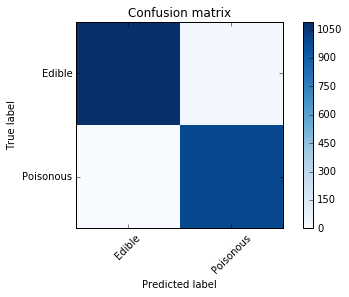

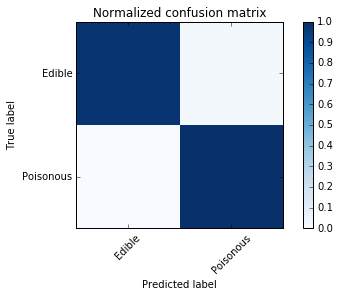

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Edible','Poisonous'], rotation=45)
    plt.yticks(tick_marks, ['Edible','Poisonous'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class_gnb)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()


Confusion matrix, without normalization
[[1117    0]
 [   0  987]]
Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


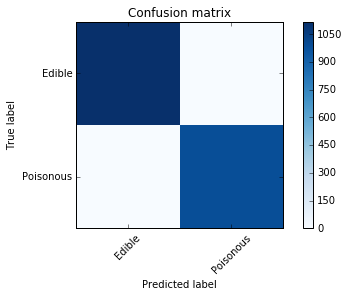

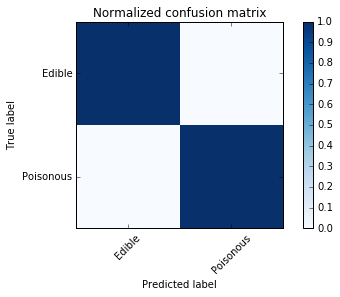

In [19]:

# Compute confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_class_logreg)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm_logreg)
plt.figure()
plot_confusion_matrix(cm_logreg)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_logreg_normalized = cm_logreg.astype('float') / cm_logreg.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_logreg_normalized)
plt.figure()
plot_confusion_matrix(cm_logreg_normalized, title='Normalized confusion matrix')

plt.show()

In [37]:
y_true=y_test.values
y_test.values


array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, y_pred_class_gnb, pos_label=1)
